<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/Binomial_distribution_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/Posto1/2.txt

--2025-01-24 13:49:24--  https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/Posto1/2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67111 (66K) [text/plain]
Saving to: ‘2.txt’

2.txt               100%[===================>]  65.54K  --.-KB/s    in 0.007s  

2025-01-24 13:49:24 (9.16 MB/s) - ‘2.txt’ saved [67111/67111]



In [2]:
import numpy as np

adc, counts = np.loadtxt("2.txt", unpack = True, skiprows = 40)

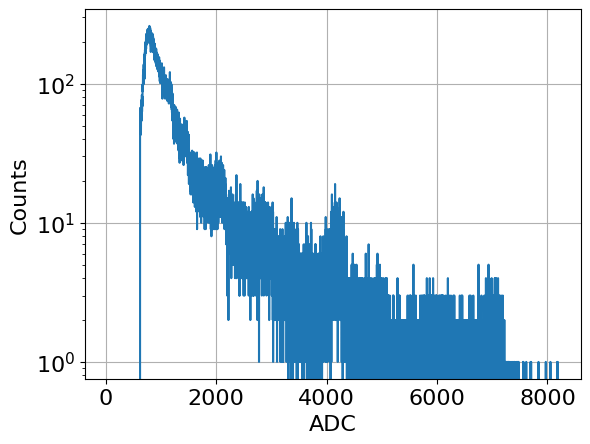

In [80]:
import matplotlib.pyplot as plt

plt.rc("font", size = 16)

plt.plot(adc, counts)
plt.yscale("log")
plt.xlabel("ADC")
plt.ylabel("Counts")
#plt.xlim(1000, 1200)

plt.grid()

In [7]:
p = 1./6 ### probabilità che esca 2 in un lancio di dado
q = 1-p ### probabilità che esca un numero diverso da 2
n = 10

In [16]:
vec = np.random.random(size = (10000))

(array([ 983.,  971., 1039.,  937., 1027., 1040.,  997., 1016., 1010.,
         980.]),
 array([2.46218116e-04, 1.00204518e-01, 2.00162818e-01, 3.00121118e-01,
        4.00079418e-01, 5.00037718e-01, 5.99996018e-01, 6.99954318e-01,
        7.99912618e-01, 8.99870918e-01, 9.99829218e-01]),
 <BarContainer object of 10 artists>)

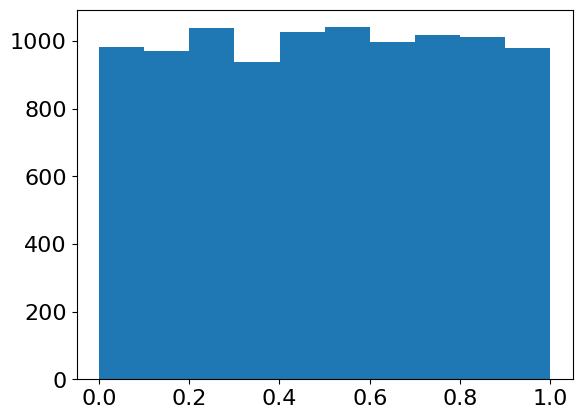

In [17]:
plt.hist(vec)

In [48]:
import math
x = 6
math.factorial(n) / (math.factorial(x) * math.factorial(n-x)) * p**x * q**(n-x)

0.0009211931834884543

In [50]:
N = 100   ### numero di volte in cui lancio i dadi
giovanni = np.zeros(N)
for j in range(N):
  n = 10     ### numero di dadi che lancio ogni volta
  numero_di_volte_in_cui_esce2 = 0
  for i in range(n):
      dado = 1 + np.random.randint(6)
      if dado == 2:
          numero_di_volte_in_cui_esce2 += 1
          print ("é uscito 2")

  print ("Numero di volte in cui il numero 2 è uscito =", numero_di_volte_in_cui_esce2)
  giovanni[j] = numero_di_volte_in_cui_esce2

é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 2
é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 2
é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 1
é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 1
é uscito 2
é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 3
é uscito 2
é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 3
é uscito 2
é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 3
é uscito 2
é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 3
é uscito 2
Numero di volte in cui il numero 2 è uscito = 1
é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 2
é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 2
é uscito 2
é uscito 2
Numero di volte in cui il numero 2 è uscito = 2
é uscito 

In [59]:
def factorial (x, n = 10, p = 1/6.):
  return math.factorial(n) / (math.factorial(x) * math.factorial(n-x)) * p**x * q**(n-x)

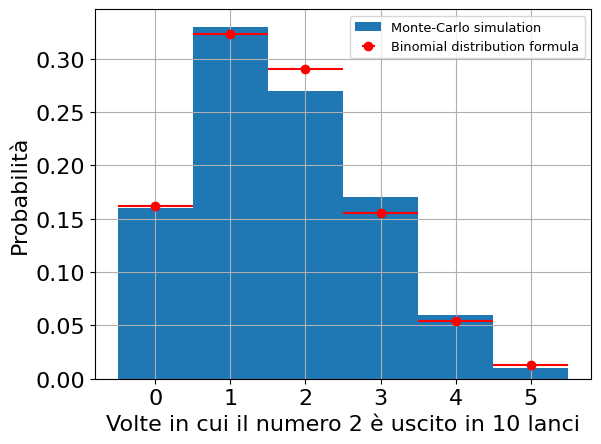

In [67]:
plt.hist(giovanni, bins = np.arange(-0.5, np.max(giovanni)+1, 1), density = True, label = "Monte-Carlo simulation");

xs = np.arange(0., np.max(giovanni)+1, 1).astype("int")
ys = np.zeros(len(xs))
for i in range(len(xs)):
  ys[i] = factorial(xs[i])

plt.errorbar(xs, ys, xerr = 0.5, color = "red", label = "Binomial distribution formula", ls = "None", marker = "o", ms = 6)
plt.legend(fontsize = "xx-small")

plt.xlabel("Volte in cui il numero 2 è uscito in 10 lanci")
plt.ylabel("Probabilità")
plt.grid()

In [68]:
def gaus (x, A, mu, sigma):
  return A * np.exp(-(x-mu)**2/(2*sigma**2))

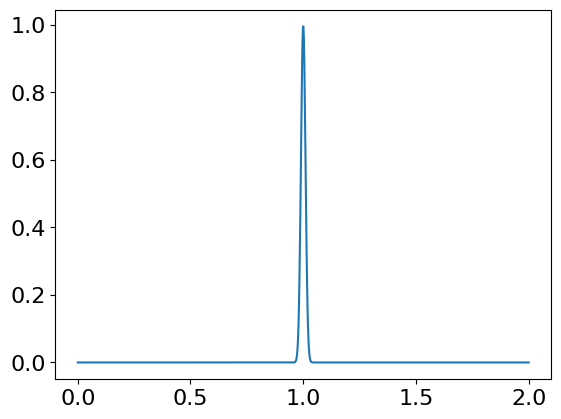

In [86]:
mu = 10000

x = np.linspace(0, mu*2, 1000)
plt.plot(x/mu, gaus(x, A = 1, mu = mu, sigma = np.sqrt(mu)))